# Using TensorFlow to create and train neural networks

To work with TensorFlow, we first need to install it. Uncomment the code below, if you haven't already done so (note that we use `pydot` and `graphviz` for visualizing the hidden layers of a neural network - but they are not necessary to run neural networks in TensorFlow).

Note that parts 5 and 6 of the notebook build on a GitHub repository by [Aurélien Géron](https://github.com/ageron/handson-ml2).

Once we have installed all packages, let's do the obligatory imports:

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# tf.__version__
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# 1. Creating a simple neural network with the Sequential API

We will recreate what we did in the last lecture: a logistic regression model that allows us to differentiate between sign-language digits 0 and 1. But this time, we will be using TensorFlow's Sequential API to build a (single-neuron) neural network. The data-handling is the same as last week:

In [2]:
X = np.load("digits_X.npy")
y = np.load("digits_y.npy")
X = np.concatenate((X[204:409], X[822:1028]), axis=0)
z = np.zeros(409 - 204)
o = np.ones(1028 - 822)
y = np.concatenate((z, o), axis=0).reshape(X.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=172
)

## 1.1 Building the model

Let's create the model. Notice that we haven't flattened the observations (recall that each value of `X` is a matrix!). The beauty about TensorFlow is that we can simply add in a `Flatten` layer, to do this for us. Hence, we have two layers in our model: the `Flatten` layer (not an actual neural network layer), and a standard `Dense` layer, with one neuron/unit (the one that performs the logistic regression).

For our `Dense` layer with one neuron, we also need to specify the activation function. Of course, for a logistic regression, we use the logistic sigmoid function, simply `'sigmoid'` in TensorFlow.

We can (but don't have to) specify a `kernel_initializer`. Usually, the defaults work fine, but with the little amount of data we have, we need to set this to `'uniform'` for things to work properly.

In [3]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(64, 64)),
        tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform"),
    ]
)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-22 23:14:53.598179: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-22 23:14:53.598356: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Note that we could also create the model step-by-step, as follows:
```
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(64,64)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer = 'uniform'))
```

Now that we have created our model, we can take a look at its layers:

In [4]:
model.layers


The `model.summary()` is a bit more informative:

In [5]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 1)                 4097      
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


The `Flatten` layer flattens each input from a (64,64)-matrix to a (4096,)-vector. However, it says (None, 4096) for the output shape. Can you guess why?

Also, can you guess what the 4097 parameters are?

In order to use our model, we also have to `compile` it. This is the step where we decide on
- the optimization algorithm (we will use `'sgd'`, or stochastic gradient descent, basically a step-by-step version of gradient descent),
- the loss function (we will use `'binary_crossentropy'`, as before),
- the metrics to keep track of as the model is being trained, in the form of a list (we will only keep track of `'accuracy'` for now).

In [6]:
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

That's it! When we compile the model, it automatically creates the forward propagation and back-propagation steps for us, based on the layers and cost function we define!

## 1.2 Training the model

We will now train the model, using the training data. We will run it for 100 "epochs", that is iterations of our optimization algorithm:

In [7]:
model.fit(X_train, y_train, epochs=100)


Epoch 1/100


2023-02-22 23:15:01.984580: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-22 23:15:02.141498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 13ms/step - loss: 2.5340 - accuracy: 0.4642
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 1.1715 - accuracy: 0.6418
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 2.3949 - accuracy: 0.4728
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 2.3053 - accuracy: 0.4470
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 1.4714 - accuracy: 0.5645
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 1.7409 - accuracy: 0.4756
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 1.2722 - accuracy: 0.5444
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 0.3884 - accuracy: 0.8395
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2406 - accuracy: 0.9169
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss: 0.2543 - accuracy: 0.9026
Epoch 11/100
11/11 [

## 1.3 Making predictions

To make predictions, we simply input the data we want to make predictions on into the model we have trained. `.numpy()` just helps with formatting

In [8]:
predictions = model(X_test).numpy()


Our predictions are values between 0 and 1. Let's get actual binary classification predictions and compute the accuracy on the test set:

In [9]:
predictions = predictions > 0.5
print("test accuracy: {} %".format(100 - np.mean(np.abs(predictions - y_test)) * 100))

test accuracy: 91.93548387096774 %


## 1.4 The same but a bit fancier

Let's restart the process (we will use `clear_session` to properly clear out TensorFlow's cache). Other than that, we will only make three small changes:
- We add validation data to the training process (we will here simply use the test data - not best practice, but this is just for showing you how the TensorFlow training can directly consider a validation data set)
- Instead of using the default `'sgd'` optimizer, we manually specify the learning rate, using the `tf.keras.optimizers.experimental.SGD` object
- We also save the output of `model.fit`, as this will be interesting for drawing graphs

In [10]:
tf.keras.backend.clear_session()


In [11]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(64, 64)),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


In [12]:
log = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
 8/11 [====================>.........] - ETA: 0s - loss: 2.2036 - accuracy: 0.4492

2023-02-22 23:15:15.871327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 30ms/step - loss: 2.3114 - accuracy: 0.4527 - val_loss: 3.9534 - val_accuracy: 0.5000
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 1.8504 - accuracy: 0.5186 - val_loss: 0.8031 - val_accuracy: 0.5000
Epoch 3/100
 1/11 [=>............................] - ETA: 0s - loss: 0.4615 - accuracy: 0.7188

2023-02-22 23:15:16.178448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 9ms/step - loss: 1.5505 - accuracy: 0.5587 - val_loss: 1.1516 - val_accuracy: 0.5000
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 1.9888 - accuracy: 0.5129 - val_loss: 1.7802 - val_accuracy: 0.5000
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 1.7306 - accuracy: 0.5072 - val_loss: 2.1187 - val_accuracy: 0.5000
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 1.5359 - accuracy: 0.5244 - val_loss: 0.4910 - val_accuracy: 0.7258
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 1.3429 - accuracy: 0.5244 - val_loss: 2.4264 - val_accuracy: 0.5000
Epoch 8/100
11/11 [==============================] - 0s 8ms/step - loss: 1.2789 - accuracy: 0.5960 - val_loss: 1.1654 - val_accuracy: 0.5161
Epoch 9/100
11/11 [==============================] - 0s 8ms/step - loss: 0.3984 - accuracy: 0.8166 - val_loss: 0.7948 - val_accuracy: 0.6452
Epoch 10/100
11/11 [=====

We can now use the log to see how the training went. The `log.history` is a dictionary that will capture, for each epoch, all the metrics we defined for our model (`['accuracy']` in our case), as well as the cost/loss, for both the training and the "validation" dataset. The keywords to use in the dictionary are simply the words you can find in the log above.

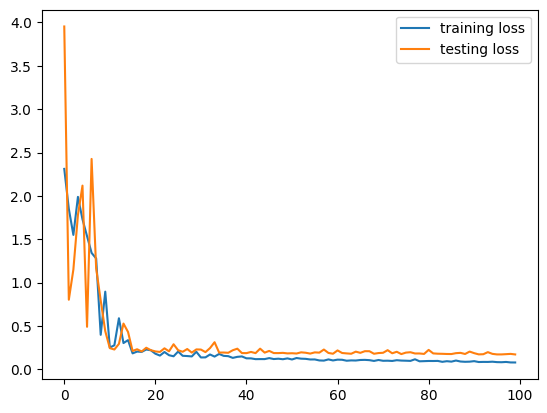

In [13]:
plt.plot(log.history["loss"], label="training loss")
plt.plot(log.history["val_loss"], label="testing loss")
plt.legend()
plt.show()

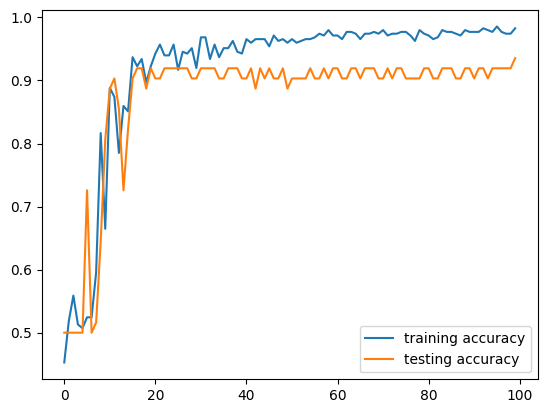

In [14]:
plt.plot(log.history["accuracy"], label="training accuracy")
plt.plot(log.history["val_accuracy"], label="testing accuracy")
plt.legend()
plt.show()

We can also look at the parameters and how they have been adjusted when the model was trained. Remember that `model.layers` gives us all the layers of our model:

In [15]:
model.layers


We can access these layers with standard Pythonic indexing. E.g., the output layer in our case is layer 1:

In [16]:
output_layer = model.layers[1]


Let's now take a look at both the weights and the bias after training. Before you run the cell, ask yourself: how many weights and biases do you expect there to be?

In [17]:
weights, bias = output_layer.get_weights()
print(weights)
print("----")
print(weights.shape)
print("----")
print(bias)

[[0.00338376]
 [0.0180232 ]
 [0.01421334]
 ...
 [0.01522353]
 [0.01372195]
 [0.03164911]]
----
(4096, 1)
----
[-0.0046734]


We make predictions as before.

In [18]:
predictions = model(X_test).numpy()
predictions = predictions > 0.5
print("test accuracy: {} %".format(100 - np.mean(np.abs(predictions - y_test)) * 100))

test accuracy: 93.54838709677419 %


Note: you can also use `model.predict(X_test)` to make predictins (try it out). This has the advantage that we can change the `batch_size` (something we will get to know later), and that it works on TenssorFlow `Dataset` objects.

# 2. Creating a deeper neural network with TensorFlow

We will now create a deeper neural network with TensorFlow's Sequential API (the same one we were just using now). Before we do so, let's properly clear out the cache:

In [19]:
tf.keras.backend.clear_session()


We can now create the model. We are using the `Flatten` layer again, to convert our input-matrices into input-vectors. We then add a number of hidden layers and an output layer. Can you add the missing layers? In particular, we want to add 
- A `Dense` layer with 3 units and the `"relu"` activation function. Hint: use `model.add(tf.keras.layers.Dense(3, activation="relu", kernel_initializer='uniform'))`
- An output layer. This should again allow you to do binary classification as before

Make sure to use `kernel_initializer='uniform'` for all `Dense` layers.

In [36]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(64, 64)))
model.add(tf.keras.layers.Dense(3, activation="relu", kernel_initializer='uniform'))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='uniform'))

In general, if you are unsure about any of the inputs to the TensorFlow functions, make sure to check the [amazing documentation](https://www.tensorflow.org/api_docs/python/tf/all_symbols).

As before, we can print out a summary of the `model`:

In [37]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 3)                 12291     
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 12,295
Trainable params: 12,295
Non-trainable params: 0
_________________________________________________________________


Do the shapes make sense to you?

Can you account for the number of parameters?

We can also visualize the layers of our model (this will rely on you having successfuly installed graphviz. Don't worry too much if you're having problem with this - the information is the same as in `model.summary()`):

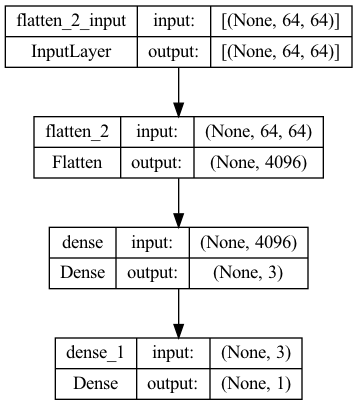

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True)


And as before, we can take a look at it's parameters (note that we haven't trained the model yet, so these are the randomly generated weights and biases):

In [41]:
hidden_layer = model.layers[1]

In [42]:
weights, bias = hidden_layer.get_weights()
print(weights)
print("----")
print(weights.shape)
print("----")
print(bias)
print("----")
print(bias.shape)

[[-0.00310504 -0.04235617  0.00144929]
 [ 0.04600736  0.03063942 -0.02409171]
 [ 0.04616118 -0.03789729  0.03287758]
 ...
 [-0.0086939  -0.02450599 -0.01828896]
 [ 0.04612073  0.01450587  0.03341885]
 [ 0.04582659 -0.01220337 -0.01506297]]
----
(4096, 3)
----
[0. 0. 0.]
----
(3,)


Finally, before training the model, we need to compile it again. We will once more use `SGD` as an optimization algorithm (with learning rate `0.01`), and `'binary_crossentropy'` as our loss (or cost) function. Also, make sure to add `"accuracy"` as a metric.

In [63]:
model.compile()  # Complete

## 2.1 Training the model

Let's now run the model for 100 epochs, similar to what we did before:

In [1]:
log = model.fit()  # Complete

NameError: name 'model' is not defined

As before, we can display the training process:

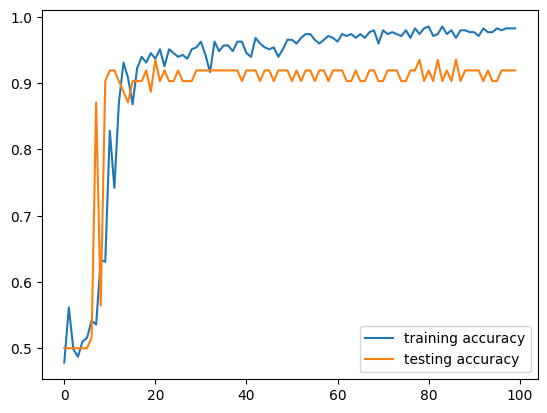

In [65]:
plt.plot(log.history["accuracy"], label="training accuracy")
plt.plot(log.history["val_accuracy"], label="testing accuracy")
plt.legend()
plt.show()

# 3. Multi-class classification with softmax

We will now see how to use a softmax activation function to classify observations into multiple classes. As always, we start by cleaning up:

In [66]:
tf.keras.backend.clear_session()


For this example, we will use the full digits dataset (recall that we had images of ten sign-language digits, with the corresponding one-hot-encoded labels). We will also be a bit more "proper" and split the dataset into training, test and validation sets:

In [67]:
X = np.load("digits_X.npy")
y = np.load("digits_y.npy")
X_train, X_other, y_train, y_other = train_test_split(
    X, y, train_size=0.8, random_state=342
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_other, y_other, train_size=0.5, random_state=152
)
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(1649, 64, 64)
(1649, 10)
(207, 64, 64)
(207, 10)
(206, 64, 64)
(206, 10)


We train a simple feed-forward network, with two hidden layers, plus the softmax layer. Remember also that we need to flatten the image-matrics:

In [68]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(64, 64)),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

Can you tell why the output layer has ten units instead of 1?

As always, it is useful to take a look at our model and try to spot any possible issues:

In [69]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 300)               1229100   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 1,270,310
Trainable params: 1,270,310
Non-trainable params: 0
_________________________________________________________________


We can then compile the model. For multiple categories, we will usually use the `categorical_crossentropy` loss (with some exceptions, one of which you will come across in this week's homework). We also use the `'adam'` optimization algorithm (with our self-defined learning rate), which we talk about in class next week. Otherwise, let's again keep track of `'accuracy'`:

In [70]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

We can now run the model, we will use 200 epochs for now:

In [71]:
log = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
 1/52 [..............................] - ETA: 17s - loss: 2.3858 - accuracy: 0.2188

2023-02-16 18:18:34.278408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 1s 20ms/step - loss: 2.4313 - accuracy: 0.1310 - val_loss: 2.1956 - val_accuracy: 0.1691
Epoch 2/100
 6/52 [==>...........................] - ETA: 0s - loss: 2.2055 - accuracy: 0.1615

2023-02-16 18:18:35.341281: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 1s 13ms/step - loss: 2.1297 - accuracy: 0.2207 - val_loss: 1.9784 - val_accuracy: 0.2947
Epoch 3/100
52/52 [==============================] - 1s 12ms/step - loss: 2.0544 - accuracy: 0.2583 - val_loss: 1.8166 - val_accuracy: 0.3720
Epoch 4/100
52/52 [==============================] - 1s 13ms/step - loss: 1.7727 - accuracy: 0.3602 - val_loss: 1.6487 - val_accuracy: 0.4203
Epoch 5/100
52/52 [==============================] - 1s 14ms/step - loss: 1.6271 - accuracy: 0.4445 - val_loss: 1.5433 - val_accuracy: 0.4831
Epoch 6/100
52/52 [==============================] - 1s 13ms/step - loss: 1.4866 - accuracy: 0.4682 - val_loss: 1.5850 - val_accuracy: 0.3865
Epoch 7/100
52/52 [==============================] - 1s 13ms/step - loss: 1.3209 - accuracy: 0.5537 - val_loss: 1.1742 - val_accuracy: 0.5894
Epoch 8/100
52/52 [==============================] - 1s 13ms/step - loss: 1.1970 - accuracy: 0.5816 - val_loss: 1.5716 - val_accuracy: 0.3913
Epoch 9/100
52/52 

Let's evaluate the model on the test data:

In [72]:
model.evaluate(X_test, y_test)


7/7 [==============================] - 0s 16ms/step - loss: 0.6669 - accuracy: 0.8350


[0.6669211387634277, 0.8349514603614807]

The accuracy is around 77%. Is that good or bad? Always consider what the baseline is (in this case, we have ten different outcomes on a balanced dataset, so anything more than 10% is at least better than random guessing)

Finally, let's take a look at how the training of the model proceeded:

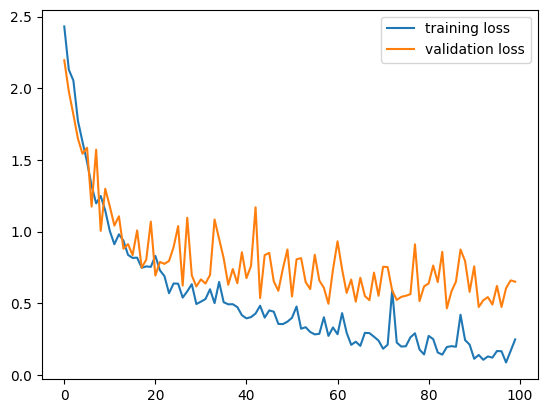

In [73]:
plt.plot(log.history["loss"], label="training loss")
plt.plot(log.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

You will see above that the training loss keeps decreasing, while the validation loss stagnates and eventually increases again. This is a point at which the model starts overfitting - any neural network will if you train it for long enough. But instead of taking the final model that is not ideal, why not take the best model (somewhere in the middle of the training process)? This is where callbacks come in.

## 3.1 Callbacks

The idea behind callbacks is that you might want to "do stuff" while training your model (for example, saving your current progress, in case your computer crashes, or saving the best model so far). We start by defining our model:

In [74]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(64, 64)),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

Let's now create a `ModelCheckpoint`, which is a call-back that saves your model in each iteration (epoch) of training. That is, whatever you might do later on with your model, you can always get back to the trained version.

In your checkpoint, you will need to specify how the model should be saved as. Moreover, if you are using `validation_data` when training your model, you can also specify `save_best_only=True`. This means, that the callback looks at your validation_loss, and only saves the model at its current state if the validation loss is better (i.e. lower) than the one in the previous saved version. Quite useful, right?

In [75]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_best_tf_regression_model.h5", save_best_only=True
)

Once we have generated the callback, we add it to our callback list in training, as we did for TensorBoard. Nothing else changes:

In [76]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb],
)

Epoch 1/30
 5/52 [=>............................] - ETA: 0s - loss: 3.1962 - accuracy: 0.1250 

2023-02-16 18:20:42.875221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 1s 16ms/step - loss: 2.5111 - accuracy: 0.1073 - val_loss: 2.2672 - val_accuracy: 0.1159
Epoch 2/30
 1/52 [..............................] - ETA: 0s - loss: 2.1826 - accuracy: 0.2188

2023-02-16 18:20:43.696220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 1s 14ms/step - loss: 2.1593 - accuracy: 0.2220 - val_loss: 2.0297 - val_accuracy: 0.2077
Epoch 3/30
52/52 [==============================] - 1s 13ms/step - loss: 2.0134 - accuracy: 0.2693 - val_loss: 1.8884 - val_accuracy: 0.3140
Epoch 4/30
52/52 [==============================] - 1s 14ms/step - loss: 1.8472 - accuracy: 0.3402 - val_loss: 1.7075 - val_accuracy: 0.3816
Epoch 5/30
52/52 [==============================] - 1s 14ms/step - loss: 1.5792 - accuracy: 0.4482 - val_loss: 1.4011 - val_accuracy: 0.4493
Epoch 6/30
52/52 [==============================] - 1s 12ms/step - loss: 1.5270 - accuracy: 0.4597 - val_loss: 1.4089 - val_accuracy: 0.4734
Epoch 7/30
52/52 [==============================] - 1s 13ms/step - loss: 1.3797 - accuracy: 0.5088 - val_loss: 1.9214 - val_accuracy: 0.2995
Epoch 8/30
52/52 [==============================] - 1s 15ms/step - loss: 1.4394 - accuracy: 0.4924 - val_loss: 1.2247 - val_accuracy: 0.5459
Epoch 9/30
52/52 [======

You can now run `tf.keras.models.load_model("my_best_tf_regression_model.h5")` to call up the version of your model that had the best validation loss:

In [77]:
model = tf.keras.models.load_model("my_best_tf_regression_model.h5")


Let's again evaluate the model:

In [78]:
model.evaluate(X_test, y_test)


7/7 [==============================] - 0s 12ms/step - loss: 0.6195 - accuracy: 0.7961


2023-02-16 18:21:04.228240: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.6194944381713867, 0.7961165308952332]

Not a huge imporvement here (if any), but it's a general process to keep in mind. For any (working) model, the loss on the validation set **will** go up eventually if you train the model enough - simply because there are so many parameters.

Another useful callback to try out (this is left to you) is the `EarlyStopping` callback, which stops the training process if the validation loss isn't improving anymore. You can call it as follows:
```
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
```

Here, `patience` defines the number of epochs which the callback waits for improvements before stopping the training. `restore_best_weights=True` means that, once training is stopped, you get the version of the model that led to the best validation loss, not the final version of the model.

You can add multiple callbacks to your model (note that the `callbacks` argument within `model.fit()` takes a list as input).

## 3.2 Saving and loading models

Sometimes, we need to save our models outside of callbacks (say, as part of an assignment :-)). TensorFlow enables this quite easily, for example with the following code. Once you have saved the model, check your working directory and you will find it there (as an "h5" file).

In [79]:
model.save("my_tf_regression_model.h5")


We can now call up the (trained) model, just as easily:

In [80]:
saved_model = tf.keras.models.load_model("my_tf_regression_model.h5")


Verify that this is the trained model by running the predictions on it. You should get the same result as with the original model:

In [81]:
X_test.shape


(206, 64, 64)

In [82]:
X_new = X_test[:1, :, :]
y_predict_original = model.predict(X_new)
y_predict_saved = saved_model.predict(X_new)
print("Predicted probabilities with original model: " + str(y_predict_original))
print("Predicted probabilities with saved model: " + str(y_predict_saved))

1/1 [==============================] - 0s 45ms/step
Predicted probabilities with original model: [[0.00248232 0.00131635 0.04237565 0.03682883 0.02725528 0.14213373
  0.00986347 0.05277275 0.68174815 0.00322352]]
Predicted probabilities with saved model: [[0.00248232 0.00131635 0.04237565 0.03682883 0.02725528 0.14213373
  0.00986347 0.05277275 0.68174815 0.00322352]]


2023-02-16 18:22:41.346429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-16 18:22:41.425019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Sometimes, you might want to save only the parameters of the model, not the entire model. Again, TensorFlow allows us to save and load the parameters quite easily:

In [83]:
model.save_weights("my_tf_regression_weights.ckpt")


In [84]:
model.load_weights("my_tf_regression_weights.ckpt")


## 3.3 Visualization with TensorBoard

We will now see how we can use TensorBoard to get more in-depth visualizations of our training process and our model. Let's start by cleaning up and making some additional imports:

In [85]:
tf.keras.backend.clear_session()


In [86]:
import os
import datetime


We can load TensorBoard into the Jupyter Notebook and specify where the relevant logs should be kept that are needed to visualize the training process:

In [87]:
%load_ext tensorboard
logdir = os.path.join(
    "logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))


We build the same baseline model as before:

In [88]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(64, 64)),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

We train our model as before (for a bit less time), but we add another `callback`. In particular one related to the `TensorBoard`:

In [89]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb],
)

Epoch 1/50
 3/52 [>.............................] - ETA: 1s - loss: 2.8528 - accuracy: 0.0729 

2023-02-16 18:22:53.313581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 1s 17ms/step - loss: 2.4519 - accuracy: 0.1116 - val_loss: 2.3152 - val_accuracy: 0.1884
Epoch 2/50
 5/52 [=>............................] - ETA: 0s - loss: 2.2875 - accuracy: 0.1688

2023-02-16 18:22:54.217569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


52/52 [==============================] - 1s 13ms/step - loss: 2.2578 - accuracy: 0.1922 - val_loss: 2.1717 - val_accuracy: 0.2657
Epoch 3/50
52/52 [==============================] - 1s 13ms/step - loss: 2.0521 - accuracy: 0.2765 - val_loss: 1.9604 - val_accuracy: 0.2464
Epoch 4/50
52/52 [==============================] - 1s 14ms/step - loss: 1.8265 - accuracy: 0.3329 - val_loss: 1.9267 - val_accuracy: 0.3188
Epoch 5/50
52/52 [==============================] - 1s 13ms/step - loss: 1.7199 - accuracy: 0.4021 - val_loss: 1.4891 - val_accuracy: 0.5411
Epoch 6/50
52/52 [==============================] - 1s 13ms/step - loss: 1.4757 - accuracy: 0.5039 - val_loss: 1.3959 - val_accuracy: 0.5700
Epoch 7/50
52/52 [==============================] - 1s 14ms/step - loss: 1.3457 - accuracy: 0.5312 - val_loss: 1.2721 - val_accuracy: 0.5411
Epoch 8/50
52/52 [==============================] - 1s 13ms/step - loss: 1.2373 - accuracy: 0.5706 - val_loss: 1.1491 - val_accuracy: 0.5894
Epoch 9/50
52/52 [======

In the training process, nothing has chaged, except that you will now find a log-folder in your working directory. We can call upon that log to display the TensorBoard as follows (if you get an error, keep reading below)

In [90]:
%tensorboard - -logdir logs


You may run into an issue here because of a conflict between TensorBoard and the environment you are using. If this is the case, you need to specify exactly where TensorBoard can be found. It should be within your environment's folder, under "bin". You can find an example below. Uncomment the next lines and adjust your path accordingly:

In [91]:
os.environ['TENSORBOARD_BINARY'] = '/Users/username/anaconda3/envs/adl_env/bin/tensorboard'
%tensorboard - -logdir logs


Reusing TensorBoard on port 6006 (pid 5068), started 0:00:01 ago. (Use '!kill 5068' to kill it.)

Enjoy exploring the TensorBoard. We will see later that we can still add a lot more functionality to it. It is particularly nice for comparing different models.

# 4. Exercise: some fundamentals of TensorFlow

## 4.1 Creating tensors

There are two types of "variables" in TensorFlow that you might work with. Actual variables, `tf.Variables`, which can be changed once they have been set, as well as constants , `tf.constant`, which cannot be changed anymore. Let's create a random array of data `X`, as well as parameter matrices `W` and `b`. Can you see why we would use `tf.constant` for `X` and `tf.Variable` for `W` and `b`?

In [122]:
X = tf.constant(np.random.randn(100, 5), name="X")
X.shape

TensorShape([100, 5])

Note that the "tensor" we create has exactly the dimension of the numpy array we use to initialize it. TensorFlow allows you to use `numpy` data quite seamlessly.

In [123]:
W = tf.Variable(np.random.randn(5, 3), name="W")
W.shape

TensorShape([5, 3])

In [109]:
b = tf.Variable(np.random.randn(1, 3), name="b")
b.shape

TensorShape([1, 3])

## 4.2 Basic operations on tensors

Let's now perform some basic operations on tensors. These work essentially the same way as in `numpy` (e.g., the typical rules of matrix-multiplication apply when we use `tf.matmul`), just that we have to learn a few different key-words:

In [125]:
z = tf.add(tf.matmul(X, W), b)
z

<tf.Tensor: shape=(100, 3), dtype=float64, numpy=
array([[ 0.04778361, -0.7583209 , -1.94854853],
       [-1.99228922,  1.43112897,  0.49306968],
       [ 0.82832566, -2.24884802, -1.95195071],
       [-1.8965805 ,  3.98909158,  0.86657584],
       [-4.75781487,  3.06433959,  0.75654319],
       [-0.95825038, -0.61631017, -0.47197544],
       [-4.03801226,  2.17252224,  1.72759381],
       [-0.81533436, -0.14413606, -1.6967775 ],
       [-1.93175928,  2.03832908,  0.20393574],
       [-0.31627174, -2.21212385, -2.70764564],
       [-3.2917586 , -0.80287317, -1.46736335],
       [-3.91649074,  1.75705373,  1.3321897 ],
       [-3.67310178,  0.4847446 , -0.40057471],
       [-0.10853323, -0.92473739, -1.22320953],
       [-2.08107737,  0.3461194 , -0.74864962],
       [-3.39116931,  6.00298259,  2.51764545],
       [-4.45491118,  4.66343834,  0.91724989],
       [-2.80049451,  1.61785876, -0.23577695],
       [-2.55537244,  0.8449478 ,  0.27398547],
       [-4.77915628,  1.31408533,  1.2

TensorFlow has all the standard activation functions in-built, for example, the logistic sigmoid one:

In [96]:
a = tf.keras.activations.sigmoid(z)
a.shape


TensorShape([100, 3])

Something that numpy cannot do, but that TensorFlow can: retrieve the gradient:

In [97]:
input_var = tf.Variable(initial_value=3.0)

with tf.GradientTape() as tape:
    result = tf.square(input_var)
    
gradient = tape.gradient(result, input_var)
print("Function value", result)
print("Gradient", gradient)

Function value tf.Tensor(9.0, shape=(), dtype=float32)
Gradient tf.Tensor(6.0, shape=(), dtype=float32)


## 4.3 Type-casting

One aspect of TensorFlow you might know from other programming languages, but which is usually taken care of for you in base Python, is that types are not automatically "cast". What that means is that we cannot run operations such as multiplying an integer and a float tensor. We cannot even multiply a `float32` tensor with a `float64` tensor! You can find the datatype of any tensor by printing it out, or by specifically looking at `tensor.dtype`:

In [98]:
b


<tf.Variable 'b:0' shape=(1, 3) dtype=float64, numpy=array([[-0.48502824, -0.37853627, -0.37921518]])>

In [99]:
b.dtype


tf.float64

We will now (explicitly) convert `b` from a `tf.float64` data-type (a float with 64 bits of precision), to a `tf.float32` data-type (a float with 32 bits of precision):

In [103]:
b = tf.cast(b, tf.float32)
b

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.48502824, -0.37853625, -0.37921518]], dtype=float32)>

Note that `X` and `W` are still of type `tf.float64` (the default). Let's try the following:

In [104]:
tf.add(tf.matmul(X, W), b)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:AddV2]

This didn't work! Let's re-cast `b` into a `tf.float64`

In [126]:
b = tf.cast(b, tf.float64)


In [127]:
b.dtype


tf.float64

In [128]:
tf.add(tf.matmul(X, W), b)

<tf.Tensor: shape=(100, 3), dtype=float64, numpy=
array([[ 0.04778361, -0.7583209 , -1.94854853],
       [-1.99228922,  1.43112897,  0.49306968],
       [ 0.82832566, -2.24884802, -1.95195071],
       [-1.8965805 ,  3.98909158,  0.86657584],
       [-4.75781487,  3.06433959,  0.75654319],
       [-0.95825038, -0.61631017, -0.47197544],
       [-4.03801226,  2.17252224,  1.72759381],
       [-0.81533436, -0.14413606, -1.6967775 ],
       [-1.93175928,  2.03832908,  0.20393574],
       [-0.31627174, -2.21212385, -2.70764564],
       [-3.2917586 , -0.80287317, -1.46736335],
       [-3.91649074,  1.75705373,  1.3321897 ],
       [-3.67310178,  0.4847446 , -0.40057471],
       [-0.10853323, -0.92473739, -1.22320953],
       [-2.08107737,  0.3461194 , -0.74864962],
       [-3.39116931,  6.00298259,  2.51764545],
       [-4.45491118,  4.66343834,  0.91724989],
       [-2.80049451,  1.61785876, -0.23577695],
       [-2.55537244,  0.8449478 ,  0.27398547],
       [-4.77915628,  1.31408533,  1.2

Now it works again!

## 4.4 Some other useful operations

Let's look at `tf.one_hot` and `tf.reshape`, two operations you come across a lot when handling data in TensorFlow. Can you see what they do?

In [134]:
y = tf.constant(3)
y_one_hot = tf.one_hot(y, 4, axis=0)
y_one_hot

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 0., 1.], dtype=float32)>

In [137]:
y

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [158]:
y = [2]
y_one_hot = tf.one_hot(y, 4, axis=0)
y_one_hot

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [159]:
tf.reshape(y_one_hot, (4,))

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 1., 0.], dtype=float32)>

# 5. Exercise: Creating a neural network for regression

We will now use a neural network for regression instead of classification. In particular, we will load a standard scikit-learn dataset that contains key characteristics of some houses in california, as well as their values (in $100,000). We will then try to predict the houses' values.

In [111]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [112]:
housing = fetch_california_housing()


The housing data comes as a dictionary: We can find the features of the data as follows:

In [113]:
housing["feature_names"]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

The actual observations (or, more precisely, the feature matrix `X`) comes with the key `'data'`:

In [114]:
housing["data"].shape

(20640, 8)

The labels come with the key `'target'`:

In [115]:
housing["target"].shape

(20640,)

As always, we start by splitting the data. We will use a training, a validation, and a testing set:

In [116]:
X_train, X_other, y_train, y_other = train_test_split(
    housing["data"], housing["target"], train_size=0.7, random_state=461
)
X_test, X_valid, y_test, y_valid = train_test_split(
    X_other, y_other, train_size=0.5, random_state=391
)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(14447, 8)
(3097, 8)
(3096, 8)


Next, we normalize the X-data. Keep in mind to not use the validation or test data in defining how the scaling process works (otherwise, you can leak information about this data into your training process). You should, however, use the same scaler on validation and test data, rather than defining your own scalers here - this will work better than normalizing all data independently:


The fit_transform method is commonly used on the training data set to learn the scaling parameters and then apply the same transformation to both the training data and the validation or test data. However, it is important to use the transform method, rather than fit_transform, on any new data sets, since we do not want to re-learn the mean and standard deviation values from these data sets.

In [117]:
scaler = StandardScaler()

# calculate the mean and sd of training data, and stored them into a cache of StandardScaler()
# then use the calculated mean and sd to scale the new data in test and validation sets 
# by appling "transform()"
X_train = scaler.fit_transform(X_train)

# Use transform instead of fit_transform on validation and test data 
# since we want to use the mean and standard deviation values that 
# were learned from the training data.
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


## 5.1 Building a neural network

Let's clear our TensorFlow session. Even if not strictly necessary, this is good practice.

In [118]:
tf.keras.backend.clear_session()


Now it's your turn! Build a neural network with three `Dense` layers: two hidden layers with `'relu'` activation, and one final output layer. The hidden layers should have 10 neurons each. For the first hidden layer, you have to specify the correct `input_shape`. Recall that this corresponds to the columns in our X-data. But make sure that `input_shape` is a list or a tuple, not just a single value, otherwise there will be an error.

For the output layer, consider whether we need any activation function at all. Remember that a linear regression is just a weighted sum of inputs plus a bias (sounds familiar?)

Save your model as `model`.

If you are stuck, first take a look at the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) of the `Dense` layers.

As always, it helps to visualize your model with the `summary()` function:

In [ ]:
model.summary()


As before, try to answer the following questions:
- Do the shapes make sense to you?
- Can you account for the number of parameters?

Now, compile your model. We are doing regression, so it is quite natural to use `'mean_squared_error'` as the loss function.

Moreover, we will us `'sgd'` as before. However, instead of specifying `optimizer = 'sgd'`, we will make a custom optimizer function, which allows us to choose our own learning rate. In particular, you should use
```
optimizer=tf.keras.optimizers.SGD(learning_rate=0.03))
```

Finally, since we are not doing classification, there is no accuracy to keep track of, so simply leave out the `metrics` argument.

Train your model for 30 epochs, also keeping track of the `validation_data`. Save the output as `log`.

Use the code below to display the loss on both the training and the validation set:

In [ ]:
plt.plot(log.history["loss"], label="training loss")
plt.plot(log.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

We can evaluate the model on the test set directly, using `model.evaluate(X_test,y_test)`. Try it out:

Finally, we can take a look at some examples and see how well we are doing on those. Run the code below, and feel free to adjust the examples.

In [ ]:
X_new = X_test[:5]
y_predict = model.predict(X_new)
y_predict = y_predict.reshape(
    -1,
)
y_predict = [round(y, 3) for y in y_predict]

In [ ]:
print("Predicted values: " + str(y_predict))
print("True values: " + str(y_test[:5]))


Can you do better? Try tweaking the learning rate, the number of layers, and the neurons per layer to see if your validation loss improves. Once you have decided on your final model, evaluate it on the test set and note down your loss there.

# 6. Exercise: More multiclass-classification

For this part, we will train a neural network on a dataset of fashion-products that is labeled with the categories of each product. The data is loaded directly from TensorFlow (which has quite the broad collection of datasets):

In [110]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_other, y_other), (X_test, y_test) = fashion_mnist.load_data()


Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)

In [ ]:
print(X_other.shape)
print(y_other.shape)
print(X_test.shape)
print(y_test.shape)


The X's are matrices (with 28x28 pixels), while the y's are numbers.

We divide the values of X by 255 (essentially standardizing the pixel-values to 0-1) and also split apart a validation set (of the same size as the test set):

In [ ]:
X_other = X_other / 255.0
X_test = X_test / 255.0
X_train, X_valid, y_train, y_valid = train_test_split(
    X_other, y_other, train_size=50000, random_state=152
)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

Let's plot two examples:

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(X_train[500], cmap="binary")
plt.axis("off")

As well as the corresponding labels:

In [ ]:
print(y_train[0])
print(y_train[500])


That's a bit hard to interpret. Luckily, we have the right names for each label available:

In [ ]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

We can now take another look at what the pictures above represent:

In [ ]:
print(class_names[y_train[0]])
print(class_names[y_train[500]])


## 6.1 Training the model

Let's start with some housekeeping:

In [ ]:
tf.keras.backend.clear_session()


Can you create a model with two hidden layers and one (softmax) output layer? The hidden layers should have 100 neurons each. You will have to figure out the number of neurons on the output layer (hint: it depends on the number of classes).

Also, don't forget to flatten the images with an appropriate `input_shape`!

Make sure you save your model as `model`.

Use the `summary` function, to see whether everything worked out as it should. If you defined the model as discussed above, you should get a total of 89,610 parameters.

In [ ]:
model.summary()


We can now compile the model. Use `optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)` and `metrics=['accuracy']`. For the loss, use `sparse_categorical_crossentropy`. This is because our y's here are **not** one-hot-encoded, but instead are values from 0 to 9.

Train the model for 30 epochs, keeping track also of the `validation_data`.

Take a look at the training process. The below will only work if you have called your training output `log`:

In [ ]:
plt.plot(log.history["accuracy"], label="training accuracy")
plt.plot(log.history["val_accuracy"], label="testing accuracy")
plt.legend()
plt.show()

If we accept our model, we can evaluate it on the test set, using the `evaluate` function of our model:

We can also take a look at some predictions:

In [ ]:
X_new = X_test[:4]
y_predict = np.argmax(model.predict(X_new), axis=-1)
y_predict = [class_names[y] for y in y_predict]


In [ ]:
plt.subplot(1, 4, 1)
plt.imshow(X_test[0], cmap="binary")
plt.axis("off")
plt.subplot(1, 4, 2)
plt.imshow(X_test[1], cmap="binary")
plt.axis("off")
plt.subplot(1, 4, 3)
plt.imshow(X_test[2], cmap="binary")
plt.axis("off")
plt.subplot(1, 4, 4)
plt.imshow(X_test[3], cmap="binary")
plt.axis("off")
print("Predictions are: " + str(y_predict))

Can you do better? Try tweaking the learning rate, the number of layers, and the neurons per layer to see if your validation loss improves. Once you have decided on your final model, evaluate it on the test set and note down your loss there.